# Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 !pip install scikit-learn==1.0

     |████████████████████████████████| 23.1 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


In [4]:
import sklearn
sklearn.__version__

'1.0'

In [5]:
from __future__ import print_function

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [7]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 200

In [8]:
!pip install scorecardpy

     |████████████████████████████████| 55 kB 2.1 MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57845 sha256=004808f6269bd98b5d32774e05eed95ef4543a54c613da70748d48fddb415340
  Stored in directory: /root/.cache/pip/wheels/9d/50/52/715367c478fd2e2317070ccf6539b2c29fc8168144cfbfaeac
Successfully built scorecardpy


In [9]:
import scorecardpy as sc

# Load and Prepare data

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
#ata = pd.read_csv('/content/drive/MyDrive/Case Studies/datasets/train.csv', sep=';', decimal=',')
# data = pd.read_csv('test_.csv')
data = pd.read_csv('/content/drive/MyDrive/dataAnalysisBonus/Dataset/df_train_datathon.csv')


display(data.shape)
display(data.head())

(500000, 320)

,Unnamed: 0,ID,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,N_23,N_24,N_25,N_26,N_27,N_28,N_29,N_30,N_31,N_32,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_48,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_61,N_62,N_63,N_64,N_65,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,N_76,N_77,N_78,N_79,N_80,N_81,N_82,N_83,N_84,N_85,N_86,N_87,N_88,N_89,N_90,N_91,N_92,N_93,N_94,N_95,N_96,N_97,N_98,N_99,N_100,N_101,N_102,N_103,N_104,N_105,N_106,N_107,N_108,N_109,N_110,N_111,N_112,N_113,N_114,N_115,N_116,N_117,N_118,N_119,N_120,N_121,N_122,N_123,N_124,N_125,N_126,N_127,N_128,N_129,N_130,N_131,N_132,N_133,N_134,N_135,N_136,N_137,N_138,N_139,N_140,N_141,N_142,N_143,N_144,N_145,N_146,N_147,N_148,N_149,N_150,N_151,N_152,N_153,N_154,N_155,N_156,N_157,N_158,N_159,N_160,N_161,N_162,N_163,N_164,N_165,N_166,N_167,N_168,N_169,N_170,N_171,N_172,N_173,N_174,N_175,N_176,N_177,N_178,N_179,N_180,N_181,N_182,N_183,N_184,N_185,N_186,N_187,N_188,N_189,N_190,N_191,N_192,N_193,N_194,N_195,N_196,N_197,N_198,N_199,N_200,N_201,N_202,N_203,N_204,N_205,N_206,N_207,N_208,N_209,N_210,N_211,N_212,N_213,N_214,N_215,N_216,N_217,N_218,N_219,N_220,N_221,N_222,N_223,N_224,N_225,N_226,N_227,N_228,N_229,N_230,N_231,N_232,N_233,N_234,N_235,N_236,N_237,N_238,N_239,N_240,N_241,N_242,N_243,N_244,N_245,N_246,N_247,N_248,N_249,N_250,N_251,N_252,N_253,N_254,N_255,N_256,N_257,N_258,N_259,N_260,N_261,N_262,N_263,N_264,N_265,N_266,N_267,N_268,N_269,N_270,N_271,N_272,N_273,N_274,N_275,N_276,N_277,N_278,N_279,N_280,N_281,N_282,N_283,N_284,N_285,N_286,N_287,N_288,N_289,N_290,N_291,N_292,N_293,N_294,N_295,N_296,N_297,N_298,N_299,N_300,N_301,N_302,N_303,N_304,N_305,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315,AGE,GENDER
0,0,0,3191,0,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,45.733334,0,0.0,8304,0.0,371,0.0,943349778,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,97,3,1491,27,286,3,0,0,2,150,3,196,5,0.0,0,0,0,0,10.733334,436,6,45.733334,3152,42,0,0,0,0,0.0,0,0.0,0,0.0,0,0,0,2500.0,0,0.0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,29,1.0,2.0,2.0,0,0.0,0,0,0,0,0.0,185,96.133334,61.133334,0,0,0,0.0,9,412,150,6,0,0,7781,8,1,1,14.0,1,0,1,0,0,0.0,0,0,0,0.0,0,0,751,0.0,0,0,110.133334,0.0,1,0,0,1,0,0.0,1,0,0,0.0,255,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,2,2,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,75011,648.666670,604.333336,49,16.333333,7343,0.00,0,0,0.0,19,2780,5,190,14,2590,0,0,44,7153,422,31099,31,2021,1,10,28.0,1,0,2,1,0,3,559,0.0,0,0,0.0,0,0.0,1,1,65122930138,0.000000,37537,0.0,867022741,0.0,0.000000,0,0,0,676.666670,0.0,2,0.666667,0,0,2,0,0.0,2,4200.0,100.0,275.166667,4,11,0,0,0,0.0,0,0,0.0,0,0.0,0.0,742,0,0,0.0,14,0,0,0,20,2035,0.0,5,190,1,11,0,0,5,7.0,4.0,178.0,NaN,NaN,NaN,0.037848,0.087087,0.452441,0.037098,0.036669,0.381190,0.061785,0.018134,0.230121,0.820451,0.023376,0.040398,32,1
1,1,1,70,1,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,99,5,898,28,0,0,0,0,81,0,0,5279,81,0.0,0,0,0,0,0.000000,0,0,0.000000,5279,81,0,0,0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,27,1.0,30.0,30.0,0,0.0,0,0,0,0,0.0,506,0.000000,0.000000,0,0,0,0.0,506,28131,0,506,0,0,6832,15,0,5,0.0,0,0,0,0,0,0.0,0,0,2,0.0,3,3,0,0.0,0,0,0.000000,0.0,0,0,0,0,0,0.0,0,0,0,0.0,197,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,2,-460.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,2,2,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,62125,3.843666,3.843666,4,1.333333,157,0.00,0,0,0.0,508,28213,0,0,508,28213,0,0,4,157,277,12077,29,1109,0,13,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,2,0.0,12,22,28649702953,348.078167,5436581,0.0,392014801,0.0,348.078167,45623012,0,45623012,351.921833,0.0,4,1.333333,0,0,2,0,0.0,2,2920.0,0.0,126.666667,0,0,0,0,0,0.0,0,0,0.0,2,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,2,0.0,4.0,86.0,0.0,1.0,1.0,0.036878,0.087087,0.452441,0.015009,0.015449,0.369818,0.053839,

# IV library

In [12]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

# Preprocess Data

In [13]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [14]:
newData = clean_dataset(data)

In [15]:
newData.head()

,Unnamed: 0,ID,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,N_23,N_24,N_25,N_26,N_27,N_28,N_29,N_30,N_31,N_32,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_48,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_61,N_62,N_63,N_64,N_65,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,N_76,N_77,N_78,N_79,N_80,N_81,N_82,N_83,N_84,N_85,N_86,N_87,N_88,N_89,N_90,N_91,N_92,N_93,N_94,N_95,N_96,N_97,N_98,N_99,N_100,N_101,N_102,N_103,N_104,N_105,N_106,N_107,N_108,N_109,N_110,N_111,N_112,N_113,N_114,N_115,N_116,N_117,N_118,N_119,N_120,N_121,N_122,N_123,N_124,N_125,N_126,N_127,N_128,N_129,N_130,N_131,N_132,N_133,N_134,N_135,N_136,N_137,N_138,N_139,N_140,N_141,N_142,N_143,N_144,N_145,N_146,N_147,N_148,N_149,N_150,N_151,N_152,N_153,N_154,N_155,N_156,N_157,N_158,N_159,N_160,N_161,N_162,N_163,N_164,N_165,N_166,N_167,N_168,N_169,N_170,N_171,N_172,N_173,N_174,N_175,N_176,N_177,N_178,N_179,N_180,N_181,N_182,N_183,N_184,N_185,N_186,N_187,N_188,N_189,N_190,N_191,N_192,N_193,N_194,N_195,N_196,N_197,N_198,N_199,N_200,N_201,N_202,N_203,N_204,N_205,N_206,N_207,N_208,N_209,N_210,N_211,N_212,N_213,N_214,N_215,N_216,N_217,N_218,N_219,N_220,N_221,N_222,N_223,N_224,N_225,N_226,N_227,N_228,N_229,N_230,N_231,N_232,N_233,N_234,N_235,N_236,N_237,N_238,N_239,N_240,N_241,N_242,N_243,N_244,N_245,N_246,N_247,N_248,N_249,N_250,N_251,N_252,N_253,N_254,N_255,N_256,N_257,N_258,N_259,N_260,N_261,N_262,N_263,N_264,N_265,N_266,N_267,N_268,N_269,N_270,N_271,N_272,N_273,N_274,N_275,N_276,N_277,N_278,N_279,N_280,N_281,N_282,N_283,N_284,N_285,N_286,N_287,N_288,N_289,N_290,N_291,N_292,N_293,N_294,N_295,N_296,N_297,N_298,N_299,N_300,N_301,N_302,N_303,N_304,N_305,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315,AGE,GENDER
1,1.0,1.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,5.0,898.0,28.0,0.0,0.0,0.0,0.0,81.0,0.0,0.0,5279.0,81.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,5279.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.000000,0.000000,0.0,0.0,0.0,0.0,506.0,28131.0,0.0,506.0,0.0,0.0,6832.0,15.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62125.0,3.843666,3.843666,4.0,1.333333,157.0,0.0,0.0,0.0,0.0,508.0,28213.0,0.0,0.0,508.0,28213.0,0.0,0.0,4.0,157.0,277.0,12077.0,29.0,1109.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12.0,22.0,2.864970e+10,348.078167,5436581.0,0.0,3.920148e+08,0.0,348.078167,45623012.0,0.0,45623012.0,351.921833,0.0,4.0,1.333333,0.0,0.0,2.0,0.0,0.0,2.0,2920.0,0.0,126.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,86.0,0.0,1.0,1.0,0.036878,0.087087,0.452441,0.015009,0.015449,0.369818,0.053839,0.014448,0.216650,0.818979,0.020141,0.012421,19.0,0.0
6,6.0,6.0,1424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1935.0,1.0,1.0,0.0,0.0,1.0,0.0,77.250000,0.0,0.0,657934049.0,0.0,0.0,0.0,1.086425e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,50.0,5.0,0.0,0.0,0.0,0.0,545.0,15.0,1551.0,21.0,157.0,5.0,0.0,0.0,0.0,109.0,2.0,109.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,266.0,7.0,27.250000,436.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,27.250000,0.000000,0.0,0.0,0.0,0.0,2.0,109.0,109.0,0.0,0.0,0.0,5375.0,30.0,0.0,17.0,170.0,0.0,0.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,

In [16]:
# from sklearn.linear_model import LogisticRegression

In [17]:
trainColumns = newData.drop('Unnamed: 0', axis=1)
trainColumns.head()

,ID,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,N_23,N_24,N_25,N_26,N_27,N_28,N_29,N_30,N_31,N_32,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_48,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_61,N_62,N_63,N_64,N_65,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,N_76,N_77,N_78,N_79,N_80,N_81,N_82,N_83,N_84,N_85,N_86,N_87,N_88,N_89,N_90,N_91,N_92,N_93,N_94,N_95,N_96,N_97,N_98,N_99,N_100,N_101,N_102,N_103,N_104,N_105,N_106,N_107,N_108,N_109,N_110,N_111,N_112,N_113,N_114,N_115,N_116,N_117,N_118,N_119,N_120,N_121,N_122,N_123,N_124,N_125,N_126,N_127,N_128,N_129,N_130,N_131,N_132,N_133,N_134,N_135,N_136,N_137,N_138,N_139,N_140,N_141,N_142,N_143,N_144,N_145,N_146,N_147,N_148,N_149,N_150,N_151,N_152,N_153,N_154,N_155,N_156,N_157,N_158,N_159,N_160,N_161,N_162,N_163,N_164,N_165,N_166,N_167,N_168,N_169,N_170,N_171,N_172,N_173,N_174,N_175,N_176,N_177,N_178,N_179,N_180,N_181,N_182,N_183,N_184,N_185,N_186,N_187,N_188,N_189,N_190,N_191,N_192,N_193,N_194,N_195,N_196,N_197,N_198,N_199,N_200,N_201,N_202,N_203,N_204,N_205,N_206,N_207,N_208,N_209,N_210,N_211,N_212,N_213,N_214,N_215,N_216,N_217,N_218,N_219,N_220,N_221,N_222,N_223,N_224,N_225,N_226,N_227,N_228,N_229,N_230,N_231,N_232,N_233,N_234,N_235,N_236,N_237,N_238,N_239,N_240,N_241,N_242,N_243,N_244,N_245,N_246,N_247,N_248,N_249,N_250,N_251,N_252,N_253,N_254,N_255,N_256,N_257,N_258,N_259,N_260,N_261,N_262,N_263,N_264,N_265,N_266,N_267,N_268,N_269,N_270,N_271,N_272,N_273,N_274,N_275,N_276,N_277,N_278,N_279,N_280,N_281,N_282,N_283,N_284,N_285,N_286,N_287,N_288,N_289,N_290,N_291,N_292,N_293,N_294,N_295,N_296,N_297,N_298,N_299,N_300,N_301,N_302,N_303,N_304,N_305,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315,AGE,GENDER
1,1.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,5.0,898.0,28.0,0.0,0.0,0.0,0.0,81.0,0.0,0.0,5279.0,81.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,5279.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.000000,0.000000,0.0,0.0,0.0,0.0,506.0,28131.0,0.0,506.0,0.0,0.0,6832.0,15.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62125.0,3.843666,3.843666,4.0,1.333333,157.0,0.0,0.0,0.0,0.0,508.0,28213.0,0.0,0.0,508.0,28213.0,0.0,0.0,4.0,157.0,277.0,12077.0,29.0,1109.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12.0,22.0,2.864970e+10,348.078167,5436581.0,0.0,3.920148e+08,0.0,348.078167,45623012.0,0.0,45623012.0,351.921833,0.0,4.0,1.333333,0.0,0.0,2.0,0.0,0.0,2.0,2920.0,0.0,126.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,86.0,0.0,1.0,1.0,0.036878,0.087087,0.452441,0.015009,0.015449,0.369818,0.053839,0.014448,0.216650,0.818979,0.020141,0.012421,19.0,0.0
6,6.0,1424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1935.0,1.0,1.0,0.0,0.0,1.0,0.0,77.250000,0.0,0.0,657934049.0,0.0,0.0,0.0,1.086425e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,50.0,5.0,0.0,0.0,0.0,0.0,545.0,15.0,1551.0,21.0,157.0,5.0,0.0,0.0,0.0,109.0,2.0,109.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,266.0,7.0,27.250000,436.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,27.250000,0.000000,0.0,0.0,0.0,0.0,2.0,109.0,109.0,0.0,0.0,0.0,5375.0,30.0,0.0,17.0,170.0,0.0,0.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1537758

In [18]:
trainColumns = trainColumns.drop('ID', axis=1)
trainColumns = trainColumns.drop('GENDER', axis=1)
trainColumns.head()

,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,N_23,N_24,N_25,N_26,N_27,N_28,N_29,N_30,N_31,N_32,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_48,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_61,N_62,N_63,N_64,N_65,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,N_76,N_77,N_78,N_79,N_80,N_81,N_82,N_83,N_84,N_85,N_86,N_87,N_88,N_89,N_90,N_91,N_92,N_93,N_94,N_95,N_96,N_97,N_98,N_99,N_100,N_101,N_102,N_103,N_104,N_105,N_106,N_107,N_108,N_109,N_110,N_111,N_112,N_113,N_114,N_115,N_116,N_117,N_118,N_119,N_120,N_121,N_122,N_123,N_124,N_125,N_126,N_127,N_128,N_129,N_130,N_131,N_132,N_133,N_134,N_135,N_136,N_137,N_138,N_139,N_140,N_141,N_142,N_143,N_144,N_145,N_146,N_147,N_148,N_149,N_150,N_151,N_152,N_153,N_154,N_155,N_156,N_157,N_158,N_159,N_160,N_161,N_162,N_163,N_164,N_165,N_166,N_167,N_168,N_169,N_170,N_171,N_172,N_173,N_174,N_175,N_176,N_177,N_178,N_179,N_180,N_181,N_182,N_183,N_184,N_185,N_186,N_187,N_188,N_189,N_190,N_191,N_192,N_193,N_194,N_195,N_196,N_197,N_198,N_199,N_200,N_201,N_202,N_203,N_204,N_205,N_206,N_207,N_208,N_209,N_210,N_211,N_212,N_213,N_214,N_215,N_216,N_217,N_218,N_219,N_220,N_221,N_222,N_223,N_224,N_225,N_226,N_227,N_228,N_229,N_230,N_231,N_232,N_233,N_234,N_235,N_236,N_237,N_238,N_239,N_240,N_241,N_242,N_243,N_244,N_245,N_246,N_247,N_248,N_249,N_250,N_251,N_252,N_253,N_254,N_255,N_256,N_257,N_258,N_259,N_260,N_261,N_262,N_263,N_264,N_265,N_266,N_267,N_268,N_269,N_270,N_271,N_272,N_273,N_274,N_275,N_276,N_277,N_278,N_279,N_280,N_281,N_282,N_283,N_284,N_285,N_286,N_287,N_288,N_289,N_290,N_291,N_292,N_293,N_294,N_295,N_296,N_297,N_298,N_299,N_300,N_301,N_302,N_303,N_304,N_305,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315,AGE
1,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,5.0,898.0,28.0,0.0,0.0,0.0,0.0,81.0,0.0,0.0,5279.0,81.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,5279.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.000000,0.000000,0.0,0.0,0.0,0.0,506.0,28131.0,0.0,506.0,0.0,0.0,6832.0,15.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62125.0,3.843666,3.843666,4.0,1.333333,157.0,0.0,0.0,0.0,0.0,508.0,28213.0,0.0,0.0,508.0,28213.0,0.0,0.0,4.0,157.0,277.0,12077.0,29.0,1109.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12.0,22.0,2.864970e+10,348.078167,5436581.0,0.0,3.920148e+08,0.0,348.078167,45623012.0,0.0,45623012.0,351.921833,0.0,4.0,1.333333,0.0,0.0,2.0,0.0,0.0,2.0,2920.0,0.0,126.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,86.0,0.0,1.0,1.0,0.036878,0.087087,0.452441,0.015009,0.015449,0.369818,0.053839,0.014448,0.216650,0.818979,0.020141,0.012421,19.0
6,1424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1935.0,1.0,1.0,0.0,0.0,1.0,0.0,77.250000,0.0,0.0,657934049.0,0.0,0.0,0.0,1.086425e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,50.0,5.0,0.0,0.0,0.0,0.0,545.0,15.0,1551.0,21.0,157.0,5.0,0.0,0.0,0.0,109.0,2.0,109.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,266.0,7.0,27.250000,436.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,27.250000,0.000000,0.0,0.0,0.0,0.0,2.0,109.0,109.0,0.0,0.0,0.0,5375.0,30.0,0.0,17.0,170.0,0.0,0.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15377589.0,0.0,0.0,0.0,197.25

In [19]:
display(trainColumns.shape)

(66108, 317)

In [20]:
# trainColumns = trainColumns.columns

In [21]:
trainColumns[:5]

,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,N_23,N_24,N_25,N_26,N_27,N_28,N_29,N_30,N_31,N_32,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_48,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_61,N_62,N_63,N_64,N_65,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,N_76,N_77,N_78,N_79,N_80,N_81,N_82,N_83,N_84,N_85,N_86,N_87,N_88,N_89,N_90,N_91,N_92,N_93,N_94,N_95,N_96,N_97,N_98,N_99,N_100,N_101,N_102,N_103,N_104,N_105,N_106,N_107,N_108,N_109,N_110,N_111,N_112,N_113,N_114,N_115,N_116,N_117,N_118,N_119,N_120,N_121,N_122,N_123,N_124,N_125,N_126,N_127,N_128,N_129,N_130,N_131,N_132,N_133,N_134,N_135,N_136,N_137,N_138,N_139,N_140,N_141,N_142,N_143,N_144,N_145,N_146,N_147,N_148,N_149,N_150,N_151,N_152,N_153,N_154,N_155,N_156,N_157,N_158,N_159,N_160,N_161,N_162,N_163,N_164,N_165,N_166,N_167,N_168,N_169,N_170,N_171,N_172,N_173,N_174,N_175,N_176,N_177,N_178,N_179,N_180,N_181,N_182,N_183,N_184,N_185,N_186,N_187,N_188,N_189,N_190,N_191,N_192,N_193,N_194,N_195,N_196,N_197,N_198,N_199,N_200,N_201,N_202,N_203,N_204,N_205,N_206,N_207,N_208,N_209,N_210,N_211,N_212,N_213,N_214,N_215,N_216,N_217,N_218,N_219,N_220,N_221,N_222,N_223,N_224,N_225,N_226,N_227,N_228,N_229,N_230,N_231,N_232,N_233,N_234,N_235,N_236,N_237,N_238,N_239,N_240,N_241,N_242,N_243,N_244,N_245,N_246,N_247,N_248,N_249,N_250,N_251,N_252,N_253,N_254,N_255,N_256,N_257,N_258,N_259,N_260,N_261,N_262,N_263,N_264,N_265,N_266,N_267,N_268,N_269,N_270,N_271,N_272,N_273,N_274,N_275,N_276,N_277,N_278,N_279,N_280,N_281,N_282,N_283,N_284,N_285,N_286,N_287,N_288,N_289,N_290,N_291,N_292,N_293,N_294,N_295,N_296,N_297,N_298,N_299,N_300,N_301,N_302,N_303,N_304,N_305,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315,AGE
1,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,5.0,898.0,28.0,0.0,0.0,0.0,0.0,81.0,0.0,0.0,5279.0,81.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,5279.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.000000,0.000000,0.0,0.0,0.0,0.0,506.0,28131.0,0.0,506.0,0.0,0.0,6832.0,15.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62125.0,3.843666,3.843666,4.0,1.333333,157.0,0.0,0.0,0.0,0.0,508.0,28213.0,0.0,0.0,508.0,28213.0,0.0,0.0,4.0,157.0,277.0,12077.0,29.0,1109.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12.0,22.0,2.864970e+10,348.078167,5436581.0,0.0,3.920148e+08,0.0,348.078167,45623012.0,0.0,45623012.0,351.921833,0.0,4.0,1.333333,0.0,0.0,2.0,0.0,0.0,2.0,2920.0,0.0,126.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,86.0,0.0,1.0,1.0,0.036878,0.087087,0.452441,0.015009,0.015449,0.369818,0.053839,0.014448,0.216650,0.818979,0.020141,0.012421,19.0
6,1424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1935.0,1.0,1.0,0.0,0.0,1.0,0.0,77.250000,0.0,0.0,657934049.0,0.0,0.0,0.0,1.086425e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,50.0,5.0,0.0,0.0,0.0,0.0,545.0,15.0,1551.0,21.0,157.0,5.0,0.0,0.0,0.0,109.0,2.0,109.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,266.0,7.0,27.250000,436.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,27.250000,0.000000,0.0,0.0,0.0,0.0,2.0,109.0,109.0,0.0,0.0,0.0,5375.0,30.0,0.0,17.0,170.0,0.0,0.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15377589.0,0.0,0.0,0.0,197.25

# Finding IV

In [22]:
final_iv, IV = data_vars(trainColumns[:1000],trainColumns['AGE'])


In [23]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,N_0,10.000000,185.000000,500,17072.0,34.144000,-16572.0,-33.144000,0.007641,0.007644,-3.106565e-04,1.666056e-09
1,N_0,187.000000,3240.000000,500,16705.0,33.410000,-16205.0,-32.410000,0.007477,0.007474,3.524123e-04,1.666056e-09
2,N_0,NaN,NaN,65108,2200414.0,33.796369,-2135306.0,-32.796369,0.984882,0.984882,-2.643405e-07,1.666056e-09
3,N_1,0.000000,1.000000,893,30294.0,33.923852,-29401.0,-32.923852,0.013559,0.013561,-1.148411e-04,2.299290e-09
4,N_1,2.000000,6.000000,107,3483.0,32.551402,-3376.0,-31.551402,0.001559,0.001557,1.166588e-03,2.299290e-09
...,...,...,...,...,...,...,...,...,...,...,...,...
1016,N_315,0.021002,0.027862,166,5625.0,33.885542,-5459.0,-32.885542,0.002518,0.002518,-8.050159e-05,1.110409e-08
1017,N_315,0.027871,0.036025,168,5588.0,33.261905,-5420.0,-32.261905,0.002501,0.002500,4.897991e-04,1.110409e-08
1018,N_315,0.036045,0.042937,165,5483.0,33.230303,-5318.0,-32.230303,0.002454,0.002453,5.192767e-04,1.110409e-08
1019,N_315,0.042989,0.233232,167,5416.0,32.431138,-5249.0,-31.431138,0.002424,0.002421,1.284126e-03,1.110409e-08


In [66]:
ivsDF = IV.sort_values('IV')
ivsDF

,VAR_NAME,IV
309,N_93,6.007931e-14
76,N_167,6.007931e-14
272,N_6,3.064914e-13
87,N_177,2.323428e-12
303,N_88,4.552128e-12
...,...,...
65,N_157,6.164091e-08
141,N_225,6.306280e-08
216,N_293,6.306564e-08
217,N_294,6.681117e-08


# **Dendrogram**

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

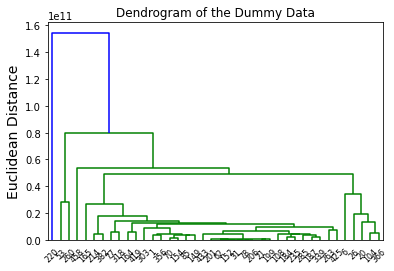

In [26]:

den = dendrogram(linkage(trainColumns[:40], method='single'), 
labels = trainColumns[:40].index)
plt.ylabel('Euclidean Distance', fontsize = 14)
plt.title('Dendrogram of the Dummy Data')
plt.show()

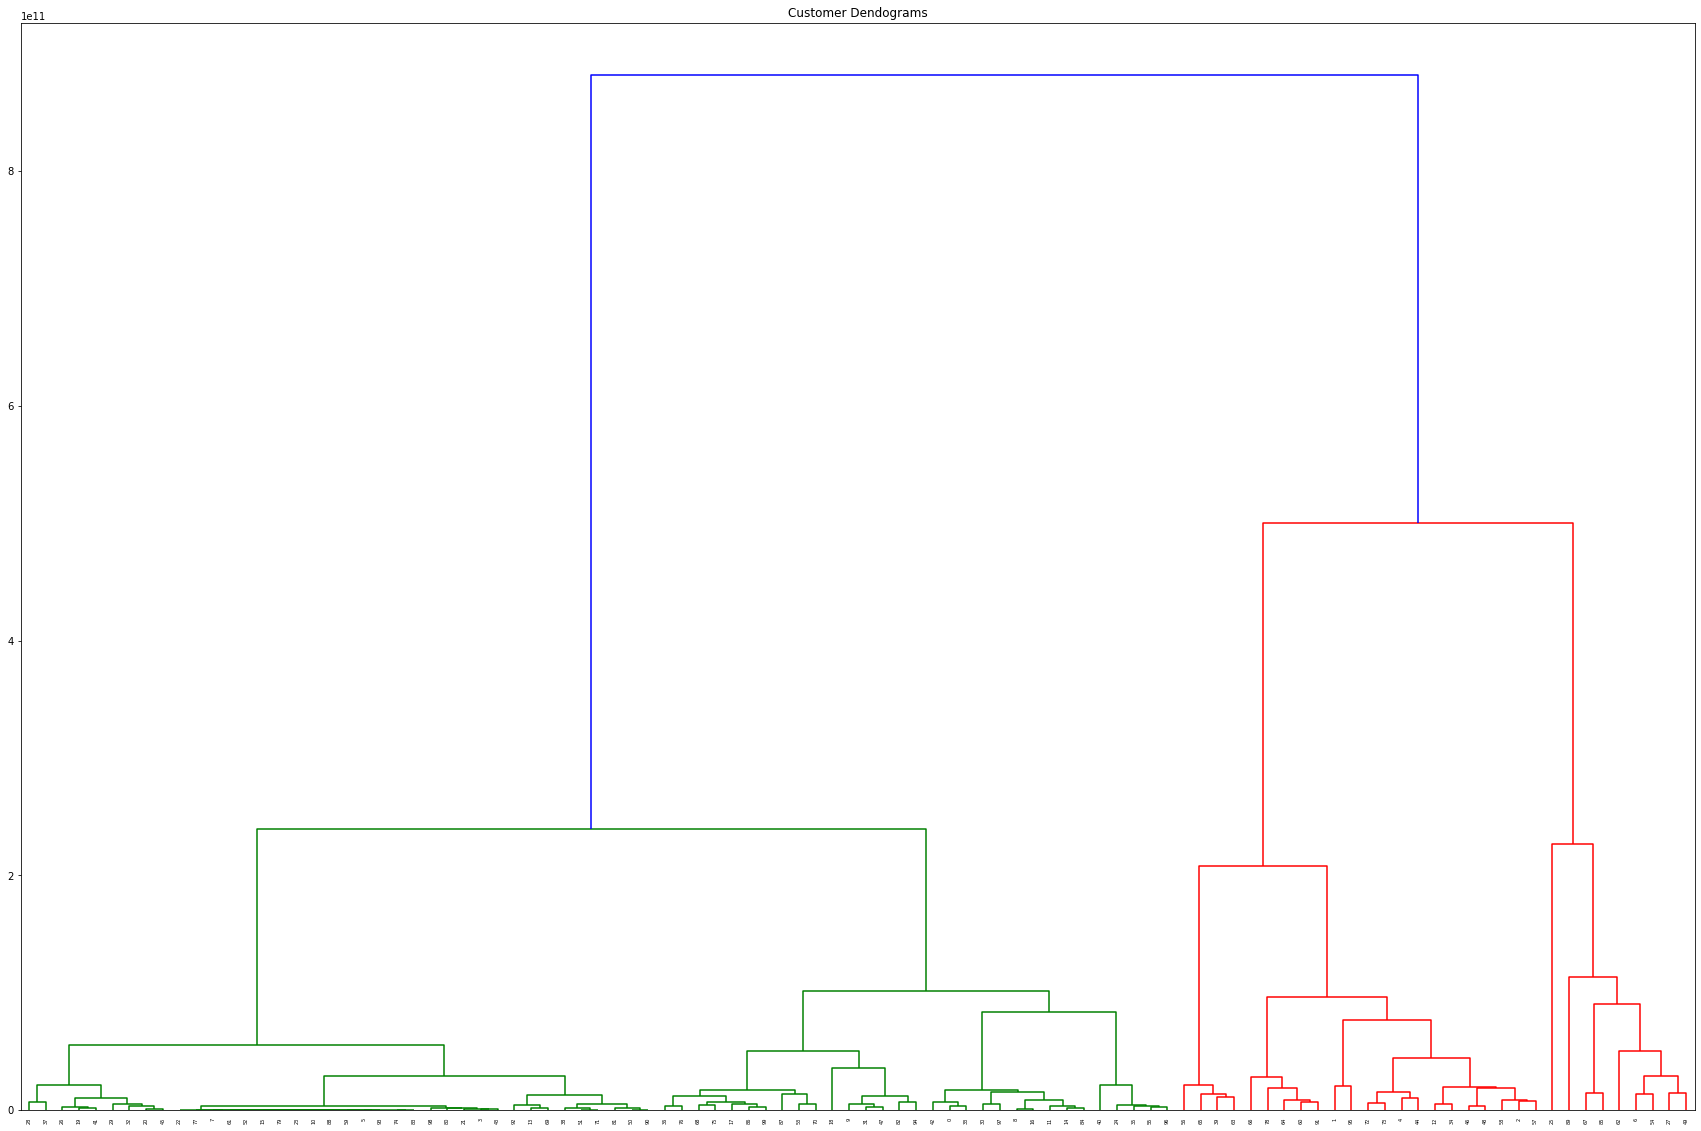

In [43]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(30, 20))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(trainColumns[:100], method='ward'))

In [48]:
aglo = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='single')
aglo.fit_predict(trainColumns[:100])

array([ 0,  9,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  8,  0,  0,  0,  0,  0, 12,  7,  0,  2,  0,  0,  0,  0,  0,  0,
        0, 12,  0,  0,  0,  6, 10,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  1, 12, 14,  0,  0,  0,  0,  0, 13,  6,  0,  6,  4,  5,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        5,  0,  0,  0, 11,  0,  0,  0,  0,  0,  3, 12,  0,  0,  0])

# Agglomerative Clustering

In [29]:
from sklearn import datasets, cluster


In [38]:
agglo = cluster.FeatureAgglomeration(n_clusters=15)
agglo.fit(trainColumns[:100])
agglo.labels_

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  9,  2,  7,  2,  8,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        6,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  6,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2, 14,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, 12,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, 13,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 14,  2,  2,
        2,  2,  2,  2,  2,  2,  2, 14,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 10,
        2,  2,  2,  2,  6,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  6,  2,  4,  2

In [40]:
agglo.n_features_in_

317

In [41]:
agglo.n_clusters_

15

In [42]:
agglo.feature_names_in_

array(['N_0', 'N_1', 'N_2', 'N_3', 'N_4', 'N_5', 'N_6', 'N_7', 'N_8',
       'N_9', 'N_10', 'N_11', 'N_12', 'N_13', 'N_14', 'N_15', 'N_16',
       'N_17', 'N_18', 'N_19', 'N_20', 'N_21', 'N_22', 'N_23', 'N_24',
       'N_25', 'N_26', 'N_27', 'N_28', 'N_29', 'N_30', 'N_31', 'N_32',
       'N_33', 'N_34', 'N_35', 'N_36', 'N_37', 'N_38', 'N_39', 'N_40',
       'N_41', 'N_42', 'N_43', 'N_44', 'N_45', 'N_46', 'N_47', 'N_48',
       'N_49', 'N_50', 'N_51', 'N_52', 'N_53', 'N_54', 'N_55', 'N_56',
       'N_57', 'N_58', 'N_59', 'N_60', 'N_61', 'N_62', 'N_63', 'N_64',
       'N_65', 'N_66', 'N_67', 'N_68', 'N_69', 'N_70', 'N_71', 'N_72',
       'N_73', 'N_74', 'N_75', 'N_76', 'N_77', 'N_78', 'N_79', 'N_80',
       'N_81', 'N_82', 'N_83', 'N_84', 'N_85', 'N_86', 'N_87', 'N_88',
       'N_89', 'N_90', 'N_91', 'N_92', 'N_93', 'N_94', 'N_95', 'N_96',
       'N_97', 'N_98', 'N_99', 'N_100', 'N_101', 'N_102', 'N_103',
       'N_104', 'N_105', 'N_106', 'N_107', 'N_108', 'N_109', 'N_110',
       'N_111

In [62]:
test_list = [agglo.feature_names_in_, agglo.labels_]

In [67]:
df2 = pd.DataFrame(list(zip(agglo.feature_names_in_,agglo.labels_,ivsDF['IV'])),columns =['Features','Class', 'IV'])
df2

,Features,Class,IV
0,N_0,2,6.007931e-14
1,N_1,2,6.007931e-14
2,N_2,2,3.064914e-13
3,N_3,2,2.323428e-12
4,N_4,2,4.552128e-12
...,...,...,...
311,N_311,2,6.164091e-08
312,N_312,2,6.306280e-08
313,N_313,2,6.306564e-08
314,N_314,2,6.681117e-08


In [74]:
grouped_df = df2.groupby("Class")
maximums = grouped_df.max()
# maximums = maximums.reset_index()
maximums

,Features,IV
Class,,
0,N_289,2.574066e-08
1,N_254,1.021478e-08
2,N_99,7.170022e-08
3,N_245,9.352297e-09
4,N_224,6.914169e-09
5,N_249,1.010112e-08
6,N_71,7.011909e-09
7,N_26,4.552128e-12
8,N_28,4.552128e-12


# Linear Regression Fit

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [121]:
columns = maximums['Features']


In [122]:
X_list = trainColumns[columns]
X_list

,N_289,N_254,N_99,N_245,N_224,N_249,N_71,N_26,N_28,N_24,N_203,N_247,N_124,N_141,N_93
1,0.0,45623012.0,0.0,2.864970e+10,12077.0,3.920148e+08,5279.0,0.0,0.000000e+00,0.000000e+00,62125.0,5436581.0,6832.0,0.0,0.0
6,761.0,0.0,0.0,1.251330e+11,19208.0,4.033299e+10,436.0,0.0,1.086425e+10,6.579340e+08,58888.0,17585000.0,5375.0,15377589.0,0.0
20,0.0,0.0,0.0,1.295118e+11,2554.0,6.605231e+09,23823.0,252971.0,8.002838e+09,9.409478e+07,33746.0,19643327.0,673.0,1599908.0,0.0
21,821.0,0.0,0.0,7.097733e+08,0.0,6.644522e+08,0.0,0.0,2.017499e+08,2.017499e+08,0.0,45321069.0,0.0,0.0,0.0
26,800.0,0.0,0.0,1.485596e+11,62749.0,5.924421e+09,2325.0,3122.0,7.782311e+09,2.499620e+07,83059.0,894831508.0,13189.0,108988.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499947,1579.0,0.0,0.0,9.529500e+04,85221.0,9.529500e+04,0.0,0.0,0.000000e+00,0.000000e+00,12043.0,0.0,23198.0,0.0,0.0
499953,827.0,0.0,0.0,4.938087e+10,7863.0,4.711968e+10,2085.0,47017569.0,1.877589e+09,1.232431e+09,30249.0,461533395.0,2546.0,109355162.0,0.0
499973,0.0,0.0,0.0,1.343145e+10,7063.0,2.306905e+08,1113.0,0.0,1.803688e+09,1.796584e+07,6074.0,88.0,7063.0,88.0,0.0
499984,1178.0,0.0,0.0,5.166663e+10,49040.0,7.902325e+09,6939.0,51419196.0,2.654414e+09,1.971458e+08,105577.0,97303558.0,19763.0,64626161.0,0.0


In [123]:
y_list = trainColumns['AGE']
y_list

1         19.0
6         40.0
20        38.0
21        35.0
26        33.0
          ... 
499947    40.0
499953    19.0
499973    58.0
499984    28.0
499995    46.0
Name: AGE, Length: 66108, dtype: float64

In [124]:

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2,
                                                    random_state=1)

In [125]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

Coefficients:  [ 4.07351403e-06  2.85234813e-09 -1.42795023e-02 -1.49999616e-11
 -1.49481757e-05  6.89502312e-12 -1.34056114e-05  6.80124388e-11
 -5.69631598e-11 -6.59117145e-11 -3.92322285e-06 -1.71669479e-11
  3.98092205e-06  1.98156630e-10  1.04514471e-04]
Variance score: 0.025555332281015808


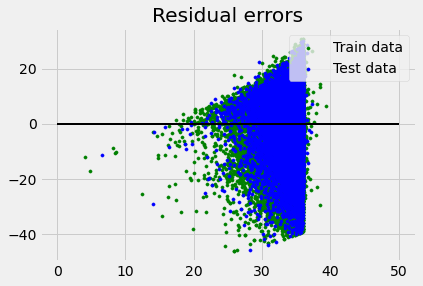

In [126]:
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

# Test Regression

In [88]:
data = pd.read_csv('/content/drive/MyDrive/dataAnalysisBonus/Dataset/df_test_datathon.csv')

display(data.shape)
display(data.head())

(100000, 318)

,Unnamed: 0,ID,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,N_23,N_24,N_25,N_26,N_27,N_28,N_29,N_30,N_31,N_32,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_48,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_61,N_62,N_63,N_64,N_65,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,N_76,N_77,N_78,N_79,N_80,N_81,N_82,N_83,N_84,N_85,N_86,N_87,N_88,N_89,N_90,N_91,N_92,N_93,N_94,N_95,N_96,N_97,N_98,N_99,N_100,N_101,N_102,N_103,N_104,N_105,N_106,N_107,N_108,N_109,N_110,N_111,N_112,N_113,N_114,N_115,N_116,N_117,N_118,N_119,N_120,N_121,N_122,N_123,N_124,N_125,N_126,N_127,N_128,N_129,N_130,N_131,N_132,N_133,N_134,N_135,N_136,N_137,N_138,N_139,N_140,N_141,N_142,N_143,N_144,N_145,N_146,N_147,N_148,N_149,N_150,N_151,N_152,N_153,N_154,N_155,N_156,N_157,N_158,N_159,N_160,N_161,N_162,N_163,N_164,N_165,N_166,N_167,N_168,N_169,N_170,N_171,N_172,N_173,N_174,N_175,N_176,N_177,N_178,N_179,N_180,N_181,N_182,N_183,N_184,N_185,N_186,N_187,N_188,N_189,N_190,N_191,N_192,N_193,N_194,N_195,N_196,N_197,N_198,N_199,N_200,N_201,N_202,N_203,N_204,N_205,N_206,N_207,N_208,N_209,N_210,N_211,N_212,N_213,N_214,N_215,N_216,N_217,N_218,N_219,N_220,N_221,N_222,N_223,N_224,N_225,N_226,N_227,N_228,N_229,N_230,N_231,N_232,N_233,N_234,N_235,N_236,N_237,N_238,N_239,N_240,N_241,N_242,N_243,N_244,N_245,N_246,N_247,N_248,N_249,N_250,N_251,N_252,N_253,N_254,N_255,N_256,N_257,N_258,N_259,N_260,N_261,N_262,N_263,N_264,N_265,N_266,N_267,N_268,N_269,N_270,N_271,N_272,N_273,N_274,N_275,N_276,N_277,N_278,N_279,N_280,N_281,N_282,N_283,N_284,N_285,N_286,N_287,N_288,N_289,N_290,N_291,N_292,N_293,N_294,N_295,N_296,N_297,N_298,N_299,N_300,N_301,N_302,N_303,N_304,N_305,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315
0,0,500000,1933,0,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0,0.0,18566464,0.0,0,0.0,8086577996,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,777,7,1262,11,2744,20,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,2744,20,0.0,10310,64,0,0,0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,30,1.0,2.0,2.0,0,0.0,0,0,0,0,0.0,137,0.0,0.0,3,0,0,0.0,0,0,0,0,0,0,6133,17,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,1,0,0,1,1,1900.0,0,0,0,0.0,130,0.0,0,0,0,3800.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,3,3,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,55450,10.250000,0.000000,75,25.000000,8249,0.000000,0,0,0.0,2,159,2,159,0,0,0,0,73,8090,180,41178,62,7234,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0.0,0,0,175922179035,0.0,58356550,0.0,103068474,0.0,0.0,0,0,0,10.250000,0.0,3,1.000000,0,0,3,3,5700.0,0,0.0,0.0,118.500000,3,0,0,0,0,0.0,0,0,0.0,0,0.0,0.0,391,0,0,0.0,4,52,1,0,0,0,0.0,0,0,0,0,0,0,0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,0.034102,0.498429,0.034106,0.039301,0.413374,0.024581,0.025465,0.165489,0.330434,0.027122,0.053936
1,1,500001,212,0,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0,0.0,106926920,0.0,1290308,0.0,12065312491,0,0,0.0,1,0,0,0.0,150,1,0,0,0,0,0,0.0,40,0,0,0,0,2198,14,18747,98,555,9,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,555,9,0.0,26767,126,0,0,0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,30,NaN,NaN,NaN,0,0.0,0,0,0,0,0.0,665,0.0,0.0,1,0,0,0.0,0,0,0,0,0,0,64606,23,0,97,0.0,0,0,0,0,0,0.0,0,0,2,0.0,1,109,620610370,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,728,0.0,0,0,0,2000.0,3380.0,0,0,0,-1425.5,0.0,0,0,0.0,0,0,0,0,2,-1425.5,0.0,120,0,0.0,0.0,0,0.0,3,5570.0,4,3,0,0.0,0,0.0,1,20.0,1,20.0,0,0.0,0,0.0,0,0.0,230894,108.500000,108.500000,80,26.666667,7212,0.000000,0,0,0.0,38,434,0,0,38,434,0,0,80,7212,1113,184173,60,6351,1,249,224.0,4,0,22,18,0,12,1210,0.0,0,0,0.0,3,0.0,16,926,154969502086,0.0,622891516,0.0,7341877874,0.0,0.0,0,0,0,332.500000,0.0,7,2.333333,0,0,4,1,2000.0,0,0.0,40.0,643.166667,30,4,0,0,0,0.0,0,0,0.0,3,0.0,0.0,861,0,0,0.0,37,82,1,0,21,1733,0.0,1,1,4,6,0,0,3,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.034102,0.498429,0.034106,0.039301,0.392022,0.018669,0.029571,0.165703,0.333914,0.031224,0.057320
2,2,5

In [90]:
newTestData = clean_dataset(data)
newTestData

,Unnamed: 0,ID,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,N_23,N_24,N_25,N_26,N_27,N_28,N_29,N_30,N_31,N_32,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_48,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_61,N_62,N_63,N_64,N_65,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,N_76,N_77,N_78,N_79,N_80,N_81,N_82,N_83,N_84,N_85,N_86,N_87,N_88,N_89,N_90,N_91,N_92,N_93,N_94,N_95,N_96,N_97,N_98,N_99,N_100,N_101,N_102,N_103,N_104,N_105,N_106,N_107,N_108,N_109,N_110,N_111,N_112,N_113,N_114,N_115,N_116,N_117,N_118,N_119,N_120,N_121,N_122,N_123,N_124,N_125,N_126,N_127,N_128,N_129,N_130,N_131,N_132,N_133,N_134,N_135,N_136,N_137,N_138,N_139,N_140,N_141,N_142,N_143,N_144,N_145,N_146,N_147,N_148,N_149,N_150,N_151,N_152,N_153,N_154,N_155,N_156,N_157,N_158,N_159,N_160,N_161,N_162,N_163,N_164,N_165,N_166,N_167,N_168,N_169,N_170,N_171,N_172,N_173,N_174,N_175,N_176,N_177,N_178,N_179,N_180,N_181,N_182,N_183,N_184,N_185,N_186,N_187,N_188,N_189,N_190,N_191,N_192,N_193,N_194,N_195,N_196,N_197,N_198,N_199,N_200,N_201,N_202,N_203,N_204,N_205,N_206,N_207,N_208,N_209,N_210,N_211,N_212,N_213,N_214,N_215,N_216,N_217,N_218,N_219,N_220,N_221,N_222,N_223,N_224,N_225,N_226,N_227,N_228,N_229,N_230,N_231,N_232,N_233,N_234,N_235,N_236,N_237,N_238,N_239,N_240,N_241,N_242,N_243,N_244,N_245,N_246,N_247,N_248,N_249,N_250,N_251,N_252,N_253,N_254,N_255,N_256,N_257,N_258,N_259,N_260,N_261,N_262,N_263,N_264,N_265,N_266,N_267,N_268,N_269,N_270,N_271,N_272,N_273,N_274,N_275,N_276,N_277,N_278,N_279,N_280,N_281,N_282,N_283,N_284,N_285,N_286,N_287,N_288,N_289,N_290,N_291,N_292,N_293,N_294,N_295,N_296,N_297,N_298,N_299,N_300,N_301,N_302,N_303,N_304,N_305,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315
16,16.0,500016.0,1430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.000000,0.0,0.0,3.479021e+08,0.0,65907.0,0.0,1.578151e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,2.0,5812.0,62.0,730.0,9.0,0.0,0.0,2.0,0.0,0.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,6.000000,730.0,9.0,6.000000,16810.0,159.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,6.000000,6.000000,0.0,0.0,0.0,0.0,2.0,24.0,0.0,2.0,0.0,0.0,28484.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257898.0,0.0,0.0,0.0,6.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120527.0,325.750000,53.000000,245.0,81.666667,23002.0,0.000000,0.0,0.0,0.0,30.0,1406.0,20.0,1194.0,10.0,212.0,0.0,0.0,225.0,21808.0,614.0,84119.0,167.0,15891.0,1.0,16.0,161.0,1.0,0.0,16.0,15.0,0.0,14.0,1369.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.886219e+10,0.0,261255.0,0.0,3.744116e+09,0.0,0.0,0.0,0.0,0.0,486.750000,0.0,5.0,1.666667,0.0,0.0,5.0,0.0,0.0,5.0,8100.0,0.0,362.000000,1.0,2.0,0.0,0.0,0.0,0.0,1.0,65.0,14.083334,0.0,0.0,0.0,743.0,5.0,212.0,371.0,13.0,0.0,0.0,0.0,63.0,8083.0,0.0,0.0,0.0,1.0,2.0,2.0,94.0,1.0,7.0,2.0,89.0,0.0,1.0,1.0,0.112430,0.059728,0.526120,0.046846,0.053857,0.421241,0.026759,0.029883,0.187968,0.345229,0.032069,0.079735
22,22.0,500022.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,117.500000,0.0,0.0,7.073486e+06,0.0,7879.0,0.0,7.126578e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,453.0,7.0,1835.0,48.0,279.0,7.0,0.0,0.0,13.0,0.0,0.0,470.0,13.0,0.0,0.0,0.0,0.0,0.0,117.500000,279.0,7.0,117.500000,3708.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,738.0,117.500000,117.500000,0.0,0.0,0.0,0.0,13.0,470.0,0.0,13.0,0.0,0.0,13953.0,20.0,0.0,1.0,11

In [91]:
newTestData2 = newTestData.drop('Unnamed: 0', axis=1)
newTestData2.head()

,ID,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19,N_20,N_21,N_22,N_23,N_24,N_25,N_26,N_27,N_28,N_29,N_30,N_31,N_32,N_33,N_34,N_35,N_36,N_37,N_38,N_39,N_40,N_41,N_42,N_43,N_44,N_45,N_46,N_47,N_48,N_49,N_50,N_51,N_52,N_53,N_54,N_55,N_56,N_57,N_58,N_59,N_60,N_61,N_62,N_63,N_64,N_65,N_66,N_67,N_68,N_69,N_70,N_71,N_72,N_73,N_74,N_75,N_76,N_77,N_78,N_79,N_80,N_81,N_82,N_83,N_84,N_85,N_86,N_87,N_88,N_89,N_90,N_91,N_92,N_93,N_94,N_95,N_96,N_97,N_98,N_99,N_100,N_101,N_102,N_103,N_104,N_105,N_106,N_107,N_108,N_109,N_110,N_111,N_112,N_113,N_114,N_115,N_116,N_117,N_118,N_119,N_120,N_121,N_122,N_123,N_124,N_125,N_126,N_127,N_128,N_129,N_130,N_131,N_132,N_133,N_134,N_135,N_136,N_137,N_138,N_139,N_140,N_141,N_142,N_143,N_144,N_145,N_146,N_147,N_148,N_149,N_150,N_151,N_152,N_153,N_154,N_155,N_156,N_157,N_158,N_159,N_160,N_161,N_162,N_163,N_164,N_165,N_166,N_167,N_168,N_169,N_170,N_171,N_172,N_173,N_174,N_175,N_176,N_177,N_178,N_179,N_180,N_181,N_182,N_183,N_184,N_185,N_186,N_187,N_188,N_189,N_190,N_191,N_192,N_193,N_194,N_195,N_196,N_197,N_198,N_199,N_200,N_201,N_202,N_203,N_204,N_205,N_206,N_207,N_208,N_209,N_210,N_211,N_212,N_213,N_214,N_215,N_216,N_217,N_218,N_219,N_220,N_221,N_222,N_223,N_224,N_225,N_226,N_227,N_228,N_229,N_230,N_231,N_232,N_233,N_234,N_235,N_236,N_237,N_238,N_239,N_240,N_241,N_242,N_243,N_244,N_245,N_246,N_247,N_248,N_249,N_250,N_251,N_252,N_253,N_254,N_255,N_256,N_257,N_258,N_259,N_260,N_261,N_262,N_263,N_264,N_265,N_266,N_267,N_268,N_269,N_270,N_271,N_272,N_273,N_274,N_275,N_276,N_277,N_278,N_279,N_280,N_281,N_282,N_283,N_284,N_285,N_286,N_287,N_288,N_289,N_290,N_291,N_292,N_293,N_294,N_295,N_296,N_297,N_298,N_299,N_300,N_301,N_302,N_303,N_304,N_305,N_306,N_307,N_308,N_309,N_310,N_311,N_312,N_313,N_314,N_315
16,500016.0,1430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.00,0.0,0.0,3.479021e+08,0.0,65907.0,0.0,1.578151e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,2.0,5812.0,62.0,730.0,9.0,0.0,0.0,2.0,0.0,0.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,730.0,9.0,6.00,16810.0,159.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,6.000000,6.0,0.0,0.0,0.0,0.0,2.0,24.0,0.0,2.0,0.0,0.0,28484.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257898.0,0.0,0.0,0.0,6.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120527.0,325.750000,53.000000,245.0,81.666667,23002.0,0.00,0.0,0.0,0.0,30.0,1406.0,20.0,1194.0,10.0,212.0,0.0,0.0,225.0,21808.0,614.0,84119.0,167.0,15891.0,1.0,16.0,161.0,1.0,0.0,16.0,15.0,0.0,14.0,1369.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.886219e+10,0.0,261255.0,0.0,3.744116e+09,0.0,0.0,0.0,0.0,0.0,486.750000,0.0,5.0,1.666667,0.0,0.0,5.0,0.0,0.0,5.0,8100.0,0.0,362.000000,1.0,2.0,0.0,0.0,0.0,0.0,1.0,65.0,14.083334,0.0,0.0,0.0,743.0,5.0,212.0,371.0,13.0,0.0,0.0,0.0,63.0,8083.0,0.0,0.0,0.0,1.0,2.0,2.0,94.0,1.0,7.0,2.0,89.0,0.0,1.0,1.0,0.112430,0.059728,0.526120,0.046846,0.053857,0.421241,0.026759,0.029883,0.187968,0.345229,0.032069,0.079735
22,500022.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,117.50,0.0,0.0,7.073486e+06,0.0,7879.0,0.0,7.126578e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,453.0,7.0,1835.0,48.0,279.0,7.0,0.0,0.0,13.0,0.0,0.0,470.0,13.0,0.0,0.0,0.0,0.0,0.0,117.5,279.0,7.0,117.50,3708.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,738.0,117.500000,117.5,0.0,0.0,0.0,0.0,13.0,470.0,0.0,13.0,0.0,0.0,13953.0,20.0,0.0,1.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9168.0,0.0

In [93]:
newTestData2.shape

(13203, 317)

In [119]:
columns = maximums['Features']
columns

Class
0     N_289
1     N_254
2      N_99
3     N_245
4     N_224
5     N_249
6      N_71
7      N_26
8      N_28
9      N_24
10    N_203
11    N_247
12    N_124
13    N_141
14     N_93
Name: Features, dtype: object

In [127]:
newTestData2[columns]

,N_289,N_254,N_99,N_245,N_224,N_249,N_71,N_26,N_28,N_24,N_203,N_247,N_124,N_141,N_93
16,8083.0,0.0,0.0,8.886219e+10,84119.0,3.744116e+09,16810.0,65907.0,1.578151e+09,3.479021e+08,120527.0,261255.0,28484.0,257898.0,0.0
22,1413.0,0.0,0.0,1.033830e+11,46152.0,1.374464e+08,3708.0,7879.0,7.126578e+09,7.073486e+06,116209.0,9168.0,13953.0,9168.0,0.0
34,6012.0,0.0,0.0,5.478061e+09,27573.0,1.839592e+09,23258.0,0.0,5.478061e+09,1.839592e+09,23385.0,0.0,27556.0,0.0,0.0
37,2578.0,0.0,0.0,1.272241e+11,24625.0,1.530322e+09,5455.0,0.0,6.897382e+09,3.268927e+08,38693.0,134637.0,6679.0,0.0,0.0
41,4347.0,0.0,0.0,5.268609e+10,106375.0,3.940933e+09,24373.0,4377120.0,2.472034e+09,9.219997e+08,226324.0,12449349.0,32022.0,4678433.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99956,1268.0,0.0,0.0,9.835414e+09,46785.0,9.815611e+09,4170.0,7823.0,9.482132e+06,9.455162e+06,28213.0,2029244.0,16123.0,2029244.0,0.0
99958,521.0,0.0,0.0,1.909234e+10,20140.0,1.909201e+10,23.0,0.0,1.330850e+05,1.330850e+05,35670.0,335907.0,1811.0,0.0,0.0
99967,2181.0,0.0,0.0,8.912281e+10,34543.0,1.631672e+09,3082.0,4743.0,7.836109e+09,1.136559e+08,28592.0,8147742.0,6274.0,19093.0,0.0
99972,4185.0,0.0,0.0,1.108464e+11,7289.0,1.091431e+08,376.0,6807.0,1.714303e+10,1.937347e+06,7137.0,362874618.0,2738.0,362673035.0,0.0


In [128]:
testColumns_PRED = reg.predict(newTestData2[columns])
testColumns_PRED

array([32.70199562, 32.84077708, 34.74689978, ..., 33.51562696,
       33.24419379, 35.58126924])

# Saving to file

In [158]:
testColumns_PRED

array([32.70199562, 32.84077708, 34.74689978, ..., 33.51562696,
       33.24419379, 35.58126924])

In [160]:
newTestData2['ID']

16       500016.0
22       500022.0
34       500034.0
37       500037.0
41       500041.0
           ...   
99956    599956.0
99958    599958.0
99967    599967.0
99972    599972.0
99984    599984.0
Name: ID, Length: 13203, dtype: float64

In [162]:
userIDs = newTestData2['ID'].to_numpy()
userIDs

array([500016., 500022., 500034., ..., 599967., 599972., 599984.])

In [163]:
results = pd.DataFrame({'ID': userIDs,
                        'Pred': testColumns_PRED})
results.head()

,ID,Pred
0,500016.0,32.701996
1,500022.0,32.840777
2,500034.0,34.746900
3,500037.0,33.063008
4,500041.0,32.307922


In [164]:
results.to_csv('/content/drive/MyDrive/dataAnalysisBonus/uahit_ramazanov.csv', index=False)